# Megan Holford Final Term Project
# World Happiness EDA
DSC530 Winter term 2020

For my final project, I am going to take a look at World Happiness data from the last few years and see if we can find any relationships and trends on happiness levels across the globe. I am going to take data from the World Happiness Report, which uses different measures from countries to score happiness levels. Using this data I would like to see what information can be gained and which factors may or may not be better indicators for overall happiness.


Some questions I have for this project are:

Is there a constant among countries with the highest/ lowest scores?
Which countries score high scores each year and which countries score lower?
Have any particular country’s scores increased over the years and have any scores decreased?
Are the overall happiness scores increasing, decreasing, or staying the same over the years?
Which factors influence overall scores the most?
Why is this information useful and what can it be used for? 

My data is available here from Kaggle :https://www.kaggle.com/mathurinache/world-happiness-report#__sid=js0

# Importing our Data and Cleaning


In [464]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import scipy.stats as ss
from scipy.stats import linregress
import plotly.express as px
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error




In [465]:
happy_2015 = pd.read_csv("2015.csv")
happy_2016 = pd.read_csv("2016.csv")
happy_2017 = pd.read_csv("2017.csv")
happy_2018 = pd.read_csv("2018.csv")
happy_2019 = pd.read_csv("2019.csv")
happy_2020 = pd.read_csv("2020.csv")

In [466]:
happy_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [467]:
happy_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [468]:
happy_2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [469]:
happy_2018.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [470]:
happy_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [471]:
happy_2020.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


This is helpful to see the inital data in our sets, but some of these columns are not neccessary. We can clean up our data to only include the information that we need and to make sure our columns match as the names from year to year are different. We want to make sure all our data matches and also to add in a column for the year for when we merge the data later.

In [472]:
happy_2015['Year'] = 2015

happy_2015 = happy_2015.rename(columns = {'Happiness Rank':'Happiness_Rank', 'Happiness Score':'Happiness_Score', 'Economy (GDP per Capita)':'GDP_per_Capita', 'Health (Life Expectancy)':'Health', 'Trust (Government Corruption)':'Government_Corruption'})

newhappy_2015 = happy_2015[['Country', 'Happiness_Rank', 'Year', 'Happiness_Score',"GDP_per_Capita", 'Family', 'Health', 'Freedom', 'Government_Corruption', 'Generosity']]
newhappy_2015.head()

,Country,Happiness_Rank,Year,Happiness_Score,GDP_per_Capita,Family,Health,Freedom,Government_Corruption,Generosity
0,Switzerland,1,2015,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,2,2015,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,3,2015,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,4,2015,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,5,2015,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [473]:
happy_2016['Year'] = 2016

happy_2016 = happy_2016.rename(columns = {'Happiness Rank':'Happiness_Rank', 'Happiness Score':'Happiness_Score', 'Economy (GDP per Capita)':'GDP_per_Capita', 'Health (Life Expectancy)':'Health', 'Trust (Government Corruption)':'Government_Corruption'})

newhappy_2016 = happy_2016[['Country', 'Happiness_Rank', 'Year', 'Happiness_Score',"GDP_per_Capita", 'Family', 'Health', 'Freedom', 'Government_Corruption', 'Generosity']]
newhappy_2016.head()

,Country,Happiness_Rank,Year,Happiness_Score,GDP_per_Capita,Family,Health,Freedom,Government_Corruption,Generosity
0,Denmark,1,2016,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171
1,Switzerland,2,2016,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083
2,Iceland,3,2016,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678
3,Norway,4,2016,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895
4,Finland,5,2016,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492


In [474]:
happy_2017['Year'] = 2017

happy_2017 = happy_2017.rename(columns = {'Happiness.Rank':'Happiness_Rank', 'Happiness.Score':'Happiness_Score','Economy..GDP.per.Capita.':'GDP_per_Capita','Health..Life.Expectancy.':'Health', 'Trust..Government.Corruption.':'Government_Corruption'})

newhappy_2017 = happy_2017[['Country', 'Happiness_Rank', 'Year', 'Happiness_Score',"GDP_per_Capita", 'Family', 'Health', 'Freedom', 'Government_Corruption', 'Generosity']]
newhappy_2017.head()

,Country,Happiness_Rank,Year,Happiness_Score,GDP_per_Capita,Family,Health,Freedom,Government_Corruption,Generosity
0,Norway,1,2017,7.537,1.616463,1.533524,0.796667,0.635423,0.315964,0.362012
1,Denmark,2,2017,7.522,1.482383,1.551122,0.792566,0.626007,0.400770,0.355280
2,Iceland,3,2017,7.504,1.480633,1.610574,0.833552,0.627163,0.153527,0.475540
3,Switzerland,4,2017,7.494,1.564980,1.516912,0.858131,0.620071,0.367007,0.290549
4,Finland,5,2017,7.469,1.443572,1.540247,0.809158,0.617951,0.382612,0.245483


In [475]:
happy_2018['Year'] = 2018

happy_2018 = happy_2018.rename(columns = {'Overall rank':'Happiness_Rank', 'Country or region':'Country', 'Score':'Happiness_Score', 'GDP per capita':'GDP_per_Capita', 'Social support':'Family', 'Healthy life expectancy':'Health', 'Freedom to make life choices':'Freedom', 'Perceptions of corruption':'Government_Corruption'})

newhappy_2018 = happy_2018[['Country', 'Happiness_Rank', 'Year', 'Happiness_Score',"GDP_per_Capita", 'Family', 'Health', 'Freedom', 'Government_Corruption', 'Generosity']]
newhappy_2018.head()

,Country,Happiness_Rank,Year,Happiness_Score,GDP_per_Capita,Family,Health,Freedom,Government_Corruption,Generosity
0,Finland,1,2018,7.632,1.305,1.592,0.874,0.681,0.393,0.202
1,Norway,2,2018,7.594,1.456,1.582,0.861,0.686,0.340,0.286
2,Denmark,3,2018,7.555,1.351,1.590,0.868,0.683,0.408,0.284
3,Iceland,4,2018,7.495,1.343,1.644,0.914,0.677,0.138,0.353
4,Switzerland,5,2018,7.487,1.420,1.549,0.927,0.660,0.357,0.256


In [476]:
happy_2019['Year'] = 2019

happy_2019 = happy_2019.rename(columns = {'Overall rank':'Happiness_Rank', 'Country or region':'Country', 'Score':'Happiness_Score', 'GDP per capita':'GDP_per_Capita', 'Social support':'Family', 'Healthy life expectancy':'Health', 'Freedom to make life choices':'Freedom', 'Perceptions of corruption':'Government_Corruption'})

newhappy_2019 = happy_2019[['Country', 'Happiness_Rank', 'Year', 'Happiness_Score',"GDP_per_Capita", 'Family', 'Health', 'Freedom', 'Government_Corruption', 'Generosity']]
newhappy_2019.head()

,Country,Happiness_Rank,Year,Happiness_Score,GDP_per_Capita,Family,Health,Freedom,Government_Corruption,Generosity
0,Finland,1,2019,7.769,1.340,1.587,0.986,0.596,0.393,0.153
1,Denmark,2,2019,7.600,1.383,1.573,0.996,0.592,0.410,0.252
2,Norway,3,2019,7.554,1.488,1.582,1.028,0.603,0.341,0.271
3,Iceland,4,2019,7.494,1.380,1.624,1.026,0.591,0.118,0.354
4,Netherlands,5,2019,7.488,1.396,1.522,0.999,0.557,0.298,0.322


In [477]:
happy_2020['Year'] = 2020
# Our data for 2020 does not have ranking, so we need to create this column as our others do have this important variable.
happy_2020['Happiness_Rank'] = happy_2020.index + 1 


happy_2020 = happy_2020.rename(columns = {'Country name':'Country', 'Ladder score':'Happiness_Score', 'Logged GDP per capita':'GDP_per_Capita', 'Social support':'Family', 'Healthy life expectancy':'Health', 'Freedom to make life choices':'Freedom', 'Perceptions of corruption':'Government_Corruption'})

newhappy_2020 = happy_2020[['Country', 'Happiness_Rank', 'Year', 'Happiness_Score',"GDP_per_Capita", 'Family', 'Health', 'Freedom', 'Government_Corruption', 'Generosity']]
newhappy_2020.head()

,Country,Happiness_Rank,Year,Happiness_Score,GDP_per_Capita,Family,Health,Freedom,Government_Corruption,Generosity
0,Finland,1,2020,7.8087,10.639267,0.954330,71.900825,0.949172,0.195445,-0.059482
1,Denmark,2,2020,7.6456,10.774001,0.955991,72.402504,0.951444,0.168489,0.066202
2,Switzerland,3,2020,7.5599,10.979933,0.942847,74.102448,0.921337,0.303728,0.105911
3,Iceland,4,2020,7.5045,10.772559,0.974670,73.000000,0.948892,0.711710,0.246944
4,Norway,5,2020,7.4880,11.087804,0.952487,73.200783,0.955750,0.263218,0.134533


Now that our data is cleaned up, we can now take a look at the relationships from year to year. Lets merge our data!

In [478]:
dataframes = [newhappy_2015, newhappy_2016, newhappy_2017, newhappy_2018, newhappy_2019]
full_happy = pd.concat(dataframes)
full_happy = full_happy.reset_index()
print(full_happy)

     index                   Country  Happiness_Rank  Year  Happiness_Score  \
0        0               Switzerland               1  2015            7.587   
1        1                   Iceland               2  2015            7.561   
2        2                   Denmark               3  2015            7.527   
3        3                    Norway               4  2015            7.522   
4        4                    Canada               5  2015            7.427   
..     ...                       ...             ...   ...              ...   
777    151                    Rwanda             152  2019            3.334   
778    152                  Tanzania             153  2019            3.231   
779    153               Afghanistan             154  2019            3.203   
780    154  Central African Republic             155  2019            3.083   
781    155               South Sudan             156  2019            2.853   

     GDP_per_Capita   Family   Health  Freedom  Gov

# Correlation and our Variables

Now that we have our data merged, we can take a look at the different variables and how they impact the overall happiness rating for countries. We want to take a look at the correlation to see which vairables have the most impact and understand how the different variables relate with our data. Spearman's correlation helps to mitigate the effect of outliers and skewed distributions and is more robust than Pearson's correlation. Spearman's correlation also works better for data with more non-linear relationships, so we will use Spearman's correlation to try and look closer at our data. 

In [479]:
spearman_cormatrix= full_happy.corr(method='spearman')
spearman_cormatrix

,index,Happiness_Rank,Year,Happiness_Score,GDP_per_Capita,Family,Health,Freedom,Government_Corruption,Generosity
index,1.000000,0.999999,-0.007803,-0.998692,-0.807630,-0.647129,-0.757912,-0.542194,-0.272914,-0.121075
Happiness_Rank,0.999999,1.000000,-0.007703,-0.998691,-0.807651,-0.647036,-0.757925,-0.542118,-0.272906,-0.121114
Year,-0.007803,-0.007703,1.000000,0.011780,0.017388,0.398488,0.127703,0.016668,-0.121344,-0.182566
Happiness_Score,-0.998692,-0.998691,0.011780,1.000000,0.806189,0.644829,0.761858,0.542282,0.272934,0.122262
GDP_per_Capita,-0.807630,-0.807651,0.017388,0.806189,1.000000,0.584098,0.795259,0.363411,0.219516,0.000188
Family,-0.647129,-0.647036,0.398488,0.644829,0.584098,1.000000,0.585729,0.435040,0.050104,-0.039533
Health,-0.757912,-0.757925,0.127703,0.761858,0.795259,0.585729,1.000000,0.361166,0.149732,0.009250
Freedom,-0.542194,-0.542118,0.016668,0.542282,0.363411,0.435040,0.361166,1.000000,0.426509,0.332020
Government_Corruption,-0.272914,-0.272906,-0.121344,0.272934,0.219516,0.050104,0.149732,0.426509,1.000000,0.271888
Generosity,-0.121075,-0.121114,-0.182566,0.122262,0.000188,-0.039533,0.009250,0.332020,0.271888,1.000000


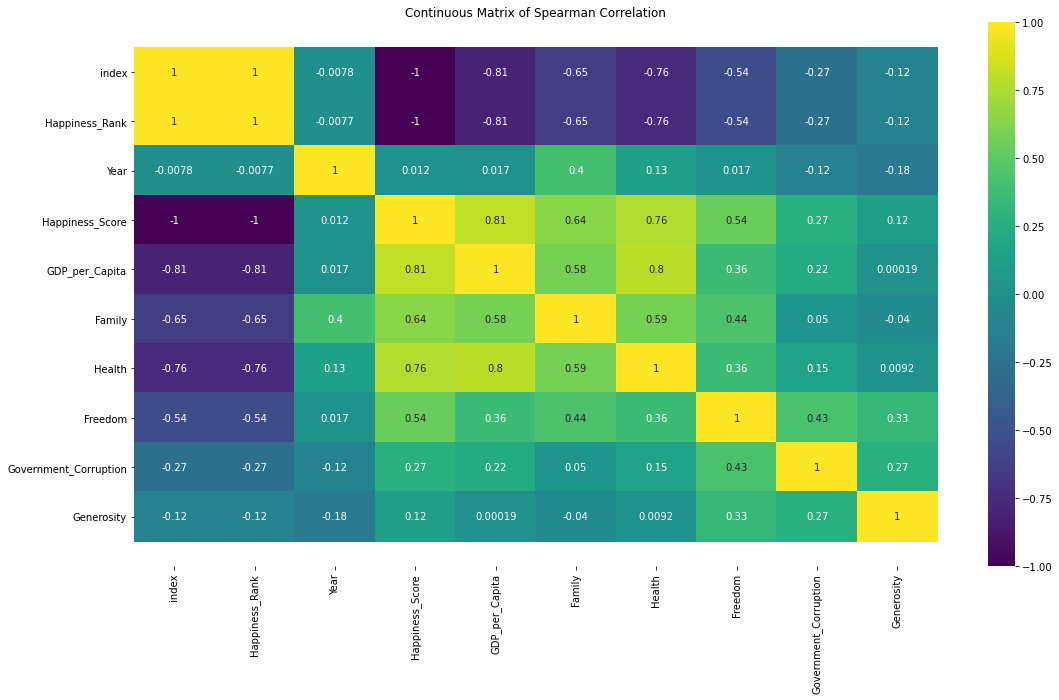

In [480]:
plt.figure(figsize=(18,10))
ax = sns.heatmap(spearman_cormatrix, vmin=-1, vmax=1, 
            center=0, cmap="viridis", annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);
plt.title("Continuous Matrix of Spearman Correlation");

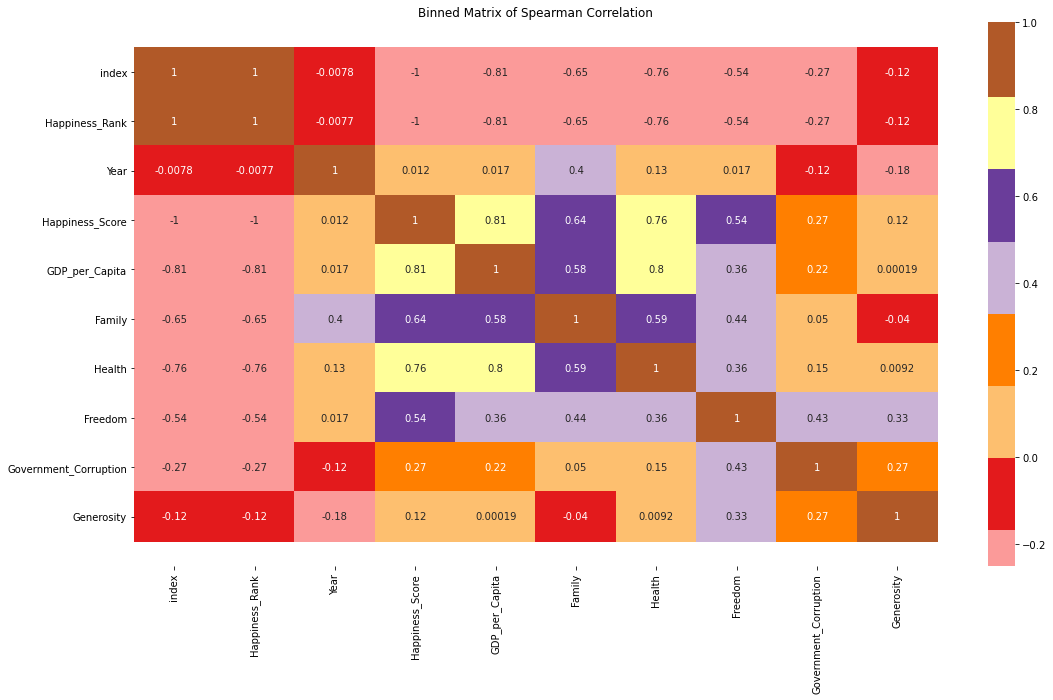

In [481]:
plt.figure(figsize=(18,10))
ax = sns.heatmap(spearman_cormatrix, vmin=-.25, vmax=1, center=0, cmap="Paired", annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);
plt.title("Binned Matrix of Spearman Correlation");

From these tables we can see that variables like GDP, Family, and Health correlate with the Happiness Rank more than some other variables like Government Corruption and Generosity which have low levels of correlation. 

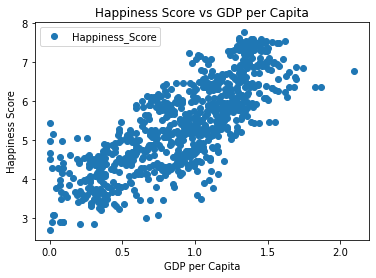

In [482]:
full_happy.plot(x='GDP_per_Capita', y='Happiness_Score', style='o')  
plt.title('Happiness Score vs GDP per Capita')  
plt.xlabel('GDP per Capita')  
plt.ylabel('Happiness Score')
plt.show()

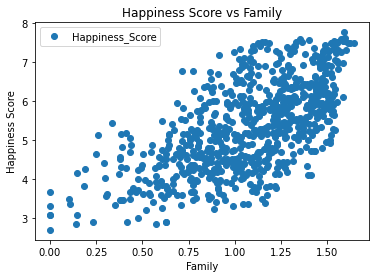

In [483]:
full_happy.plot(x='Family', y='Happiness_Score', style='o')  
plt.title('Happiness Score vs Family')  
plt.xlabel('Family')  
plt.ylabel('Happiness Score')
plt.show()

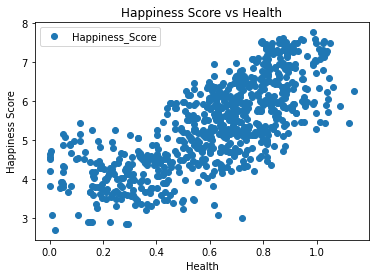

In [484]:
full_happy.plot(x='Health', y='Happiness_Score', style='o')  
plt.title('Happiness Score vs Health')  
plt.xlabel('Health')  
plt.ylabel('Happiness Score')
plt.show()

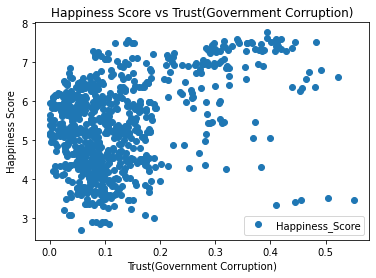

In [485]:
full_happy.plot(x='Government_Corruption', y='Happiness_Score', style='o')  
plt.title('Happiness Score vs Trust(Government Corruption)')  
plt.xlabel('Trust(Government Corruption)')  
plt.ylabel('Happiness Score')
plt.show()

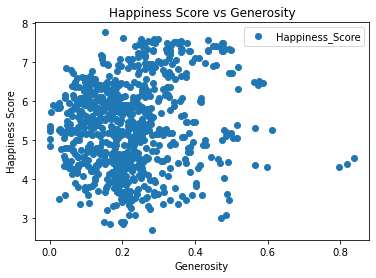

In [486]:
full_happy.plot(x='Generosity', y='Happiness_Score', style='o')  
plt.title('Happiness Score vs Generosity')  
plt.xlabel('Generosity')  
plt.ylabel('Happiness Score')
plt.show()

Based on the scatterplots, we can see that there is more of a linear relationship between Happiness Score and GDP, Health, and Family. The relationship between Happiness Score and Generosity and Trust is not very strong and non-linear. 

# Histograms of Variables

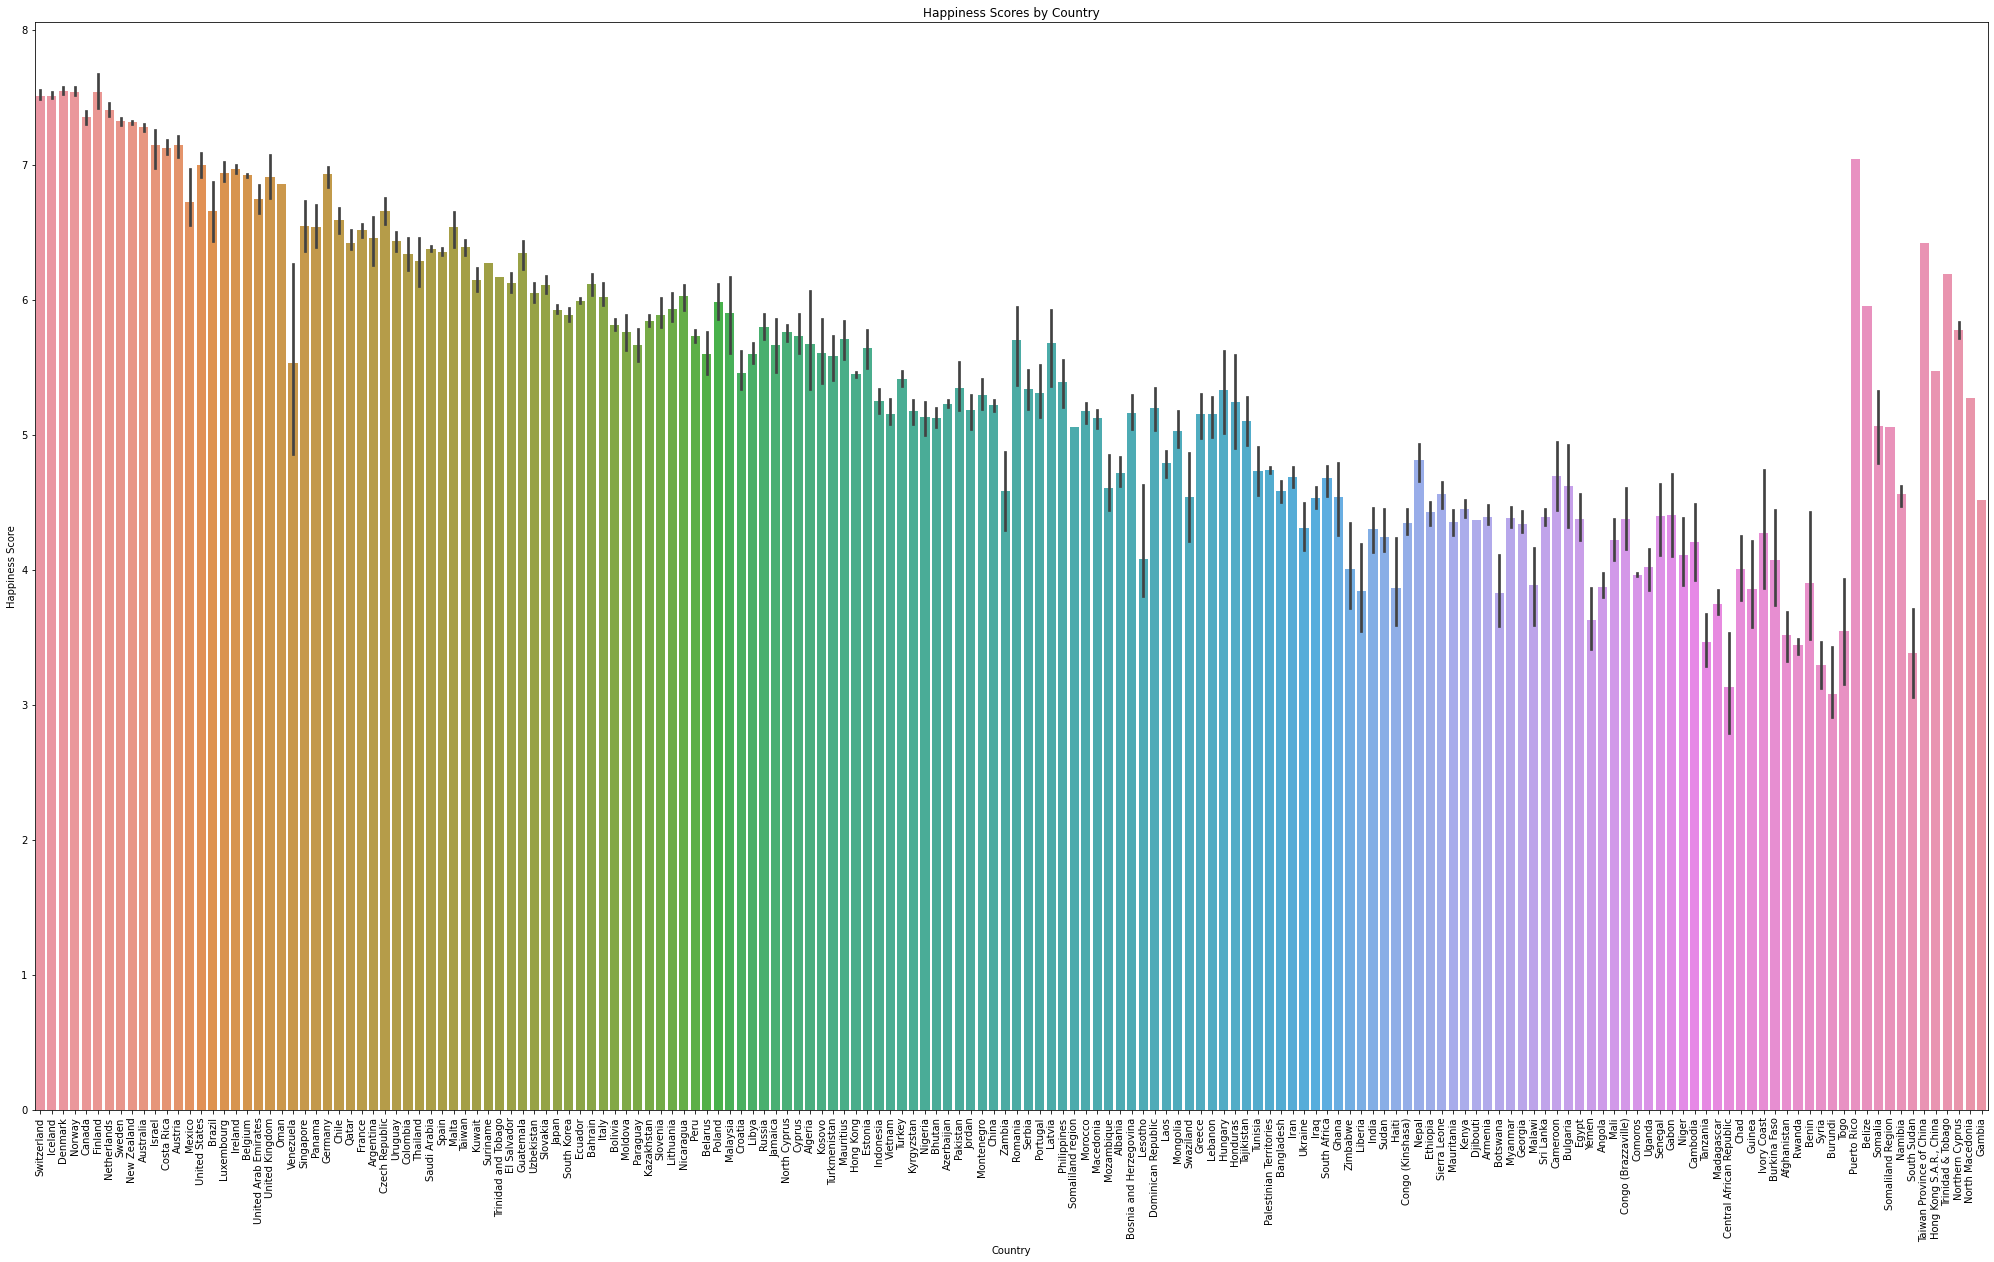

In [487]:
plt.figure(figsize=(35,20))
plt.title("Happiness Scores by Country")
sns.barplot(x=full_happy.Country, y=full_happy.Happiness_Score)
plt.xticks(rotation= 90)
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.show()

Variable: GDP per Capita

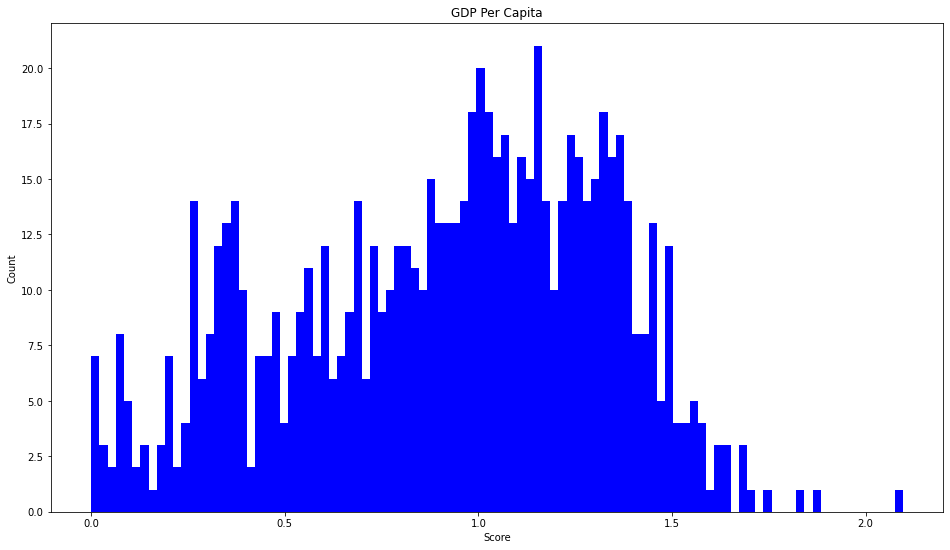

In [488]:
plt.figure(figsize=(16, 9))
plt.hist(full_happy.GDP_per_Capita, bins = 99, color = "blue")
plt.title("GDP Per Capita");
plt.xlabel("Score");
plt.ylabel("Count");
plt.plot();

In [489]:
print("Mean rating: {:.2f}".format(np.mean(full_happy.GDP_per_Capita)))
print("Median rating: {}".format(np.median(full_happy.GDP_per_Capita)))
print("Mode rating: {}".format(int(ss.mode(full_happy.GDP_per_Capita)[0])))
print("Skew of Ratings: {:.2f}".format(float(ss.skew(full_happy.GDP_per_Capita))))
print("Kurtosis of Ratings: {:.2f}".format(float(ss.kurtosis(full_happy.GDP_per_Capita))))

Mean rating: 0.92
Median rating: 0.9822047088146211
Mode rating: 0
Skew of Ratings: -0.32
Kurtosis of Ratings: -0.70


Variable: Family

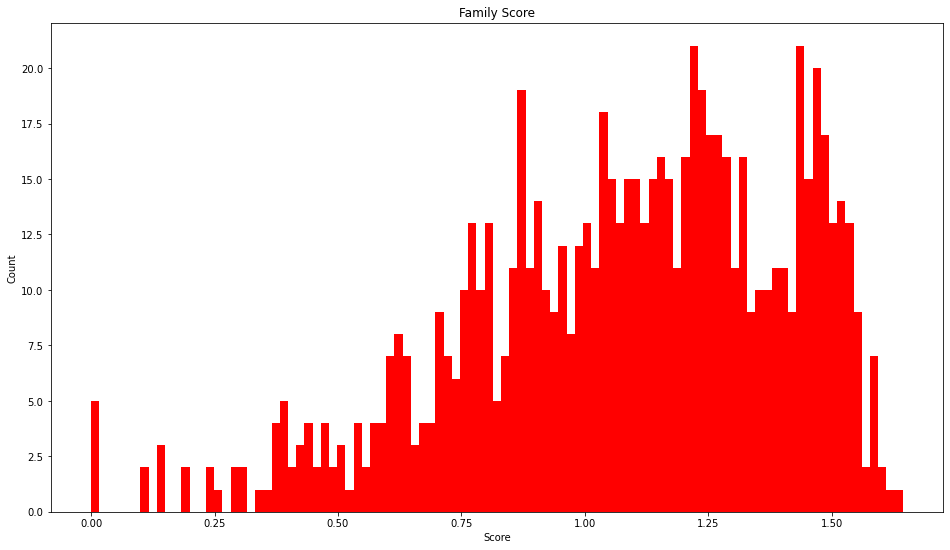

In [490]:
plt.figure(figsize=(16, 9))
plt.hist(full_happy.Family, bins = 99, color = "red")
plt.title("Family Score");
plt.xlabel("Score");
plt.ylabel("Count");
plt.plot();

In [491]:
print("Mean rating: {:.2f}".format(np.mean(full_happy.Family)))
print("Median rating: {}".format(np.median(full_happy.Family)))
print("Mode rating: {}".format(int(ss.mode(full_happy.Family)[0])))
print("Skew of Ratings: {:.2f}".format(float(ss.skew(full_happy.Family))))
print("Kurtosis of Ratings: {:.2f}".format(float(ss.kurtosis(full_happy.Family))))

Mean rating: 1.08
Median rating: 1.124735
Mode rating: 0
Skew of Ratings: -0.68
Kurtosis of Ratings: 0.15


#Variable: Health

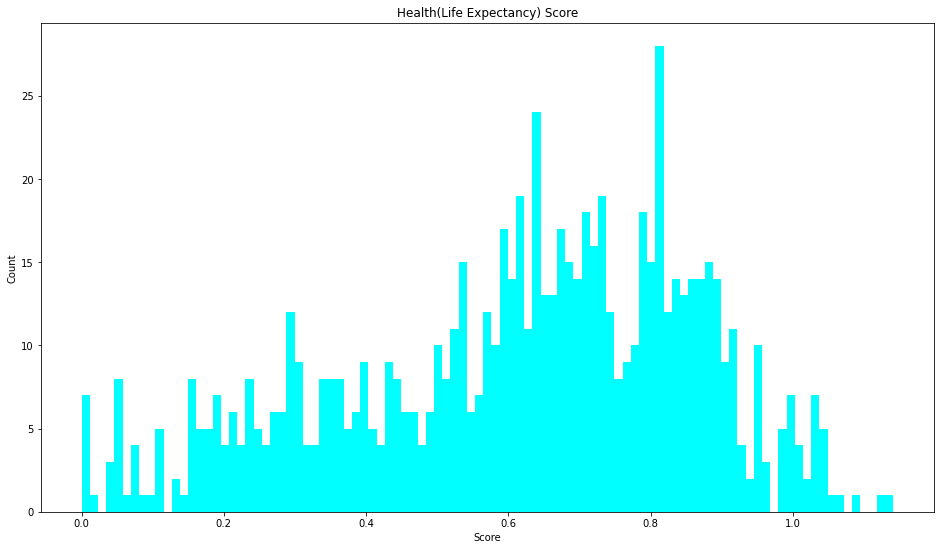

In [492]:
plt.figure(figsize=(16, 9))
plt.hist(full_happy.Health, bins = 99, color = "cyan")
plt.title("Health(Life Expectancy) Score");
plt.xlabel("Score");
plt.ylabel("Count");
plt.plot();

In [493]:
print("Mean rating: {:.2f}".format(np.mean(full_happy.Health)))
print("Median rating: {}".format(np.median(full_happy.Health)))
print("Mode rating: {}".format(int(ss.mode(full_happy.Health)[0])))
print("Skew of Ratings: {:.2f}".format(float(ss.skew(full_happy.Health))))
print("Kurtosis of Ratings: {:.2f}".format(float(ss.kurtosis(full_happy.Health))))

Mean rating: 0.61
Median rating: 0.6473095147037505
Mode rating: 0
Skew of Ratings: -0.50
Kurtosis of Ratings: -0.49


Variable: Generosity

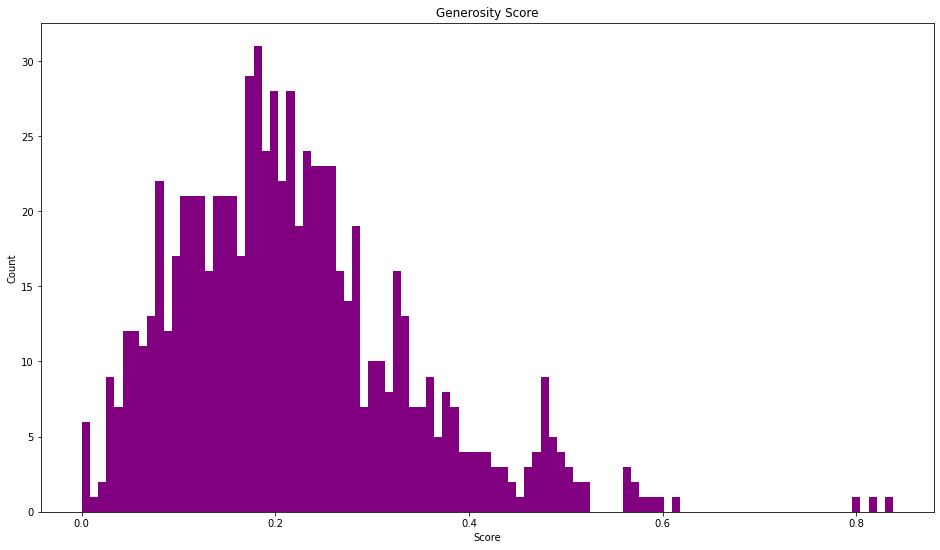

In [494]:
plt.figure(figsize=(16, 9))
plt.hist(full_happy.Generosity, bins = 99, color = "purple")
plt.title("Generosity Score");
plt.xlabel("Score");
plt.ylabel("Count");
plt.plot();

In [495]:
print("Mean rating: {:.2f}".format(np.mean(full_happy.Generosity)))
print("Median rating: {}".format(np.median(full_happy.Generosity)))
print("Mode rating: {}".format(int(ss.mode(full_happy.Generosity)[0])))
print("Skew of Ratings: {:.2f}".format(float(ss.skew(full_happy.Generosity))))
print("Kurtosis of Ratings: {:.2f}".format(float(ss.kurtosis(full_happy.Generosity))))

Mean rating: 0.22
Median rating: 0.20198221153020848
Mode rating: 0
Skew of Ratings: 1.04
Kurtosis of Ratings: 2.00


Variable: Trust

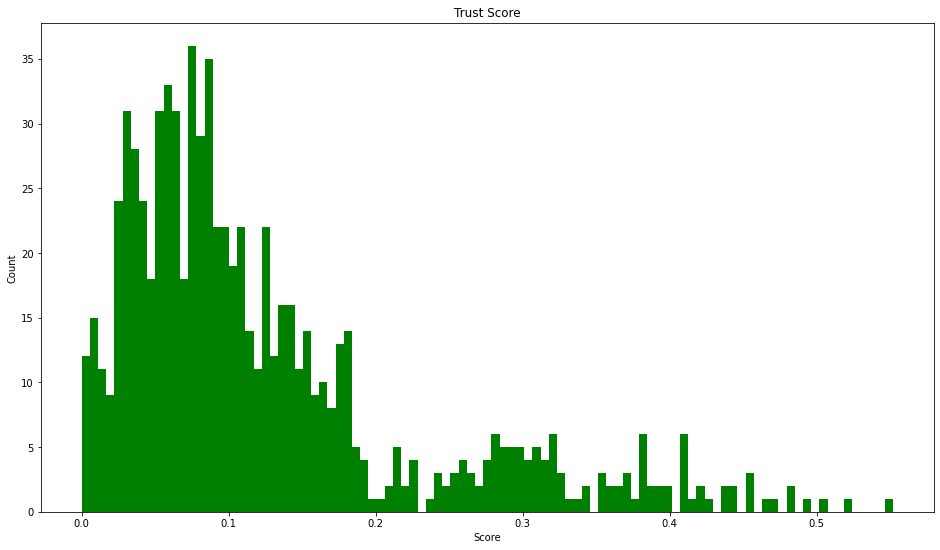

In [496]:
plt.figure(figsize=(16, 9))
plt.hist(full_happy.Government_Corruption, bins = 99, color = "green")
plt.title("Trust Score");
plt.xlabel("Score");
plt.ylabel("Count");
plt.plot();

In [497]:
print("Mean rating: {:.2f}".format(np.mean(full_happy.Government_Corruption)))
print("Median rating: {}".format(np.median(full_happy.Government_Corruption)))
print("Mode rating: {}".format(int(ss.mode(full_happy.Government_Corruption)[0])))
print("Skew of Ratings: {:.2f}".format(float(ss.skew(full_happy.Government_Corruption))))
print("Kurtosis of Ratings: {:.2f}".format(float(ss.kurtosis(full_happy.Government_Corruption))))

Mean rating: 0.13
Median rating: nan
Mode rating: 0
Skew of Ratings: nan
Kurtosis of Ratings: nan


# Analysis

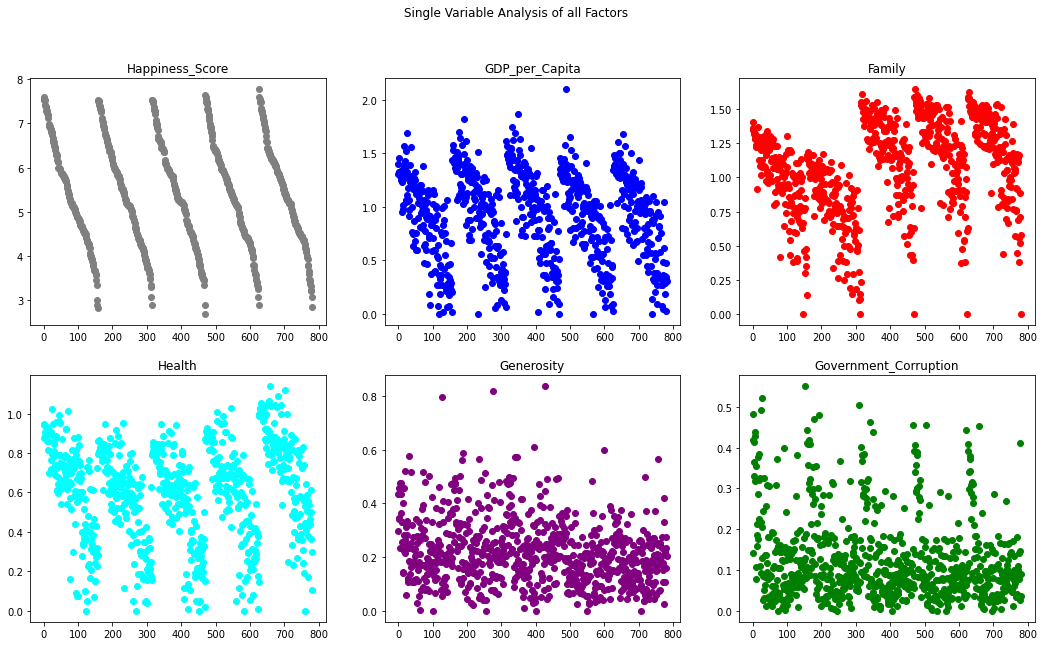

In [498]:
numerics = ['Happiness_Score', 'GDP_per_Capita', 'Family', 'Health', 'Generosity',
       'Government_Corruption']
color = ['gray','blue','red','cyan','purple','green']

plt.figure(figsize = (18,10))
plt.suptitle("Single Variable Analysis of all Factors")
for i in numerics:
    plt.subplot(2,3,numerics.index(i)+1)
    plt.scatter(np.arange(full_happy.shape[0]),full_happy[i], color = color[numerics.index(i)])
    plt.title(i)
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2429: RuntimeWarning:

invalid value encountered in double_scalars

<ipython-input-499-e575321b845c>:12: UserWarning:

FixedFormatter should only be used together with FixedLocator



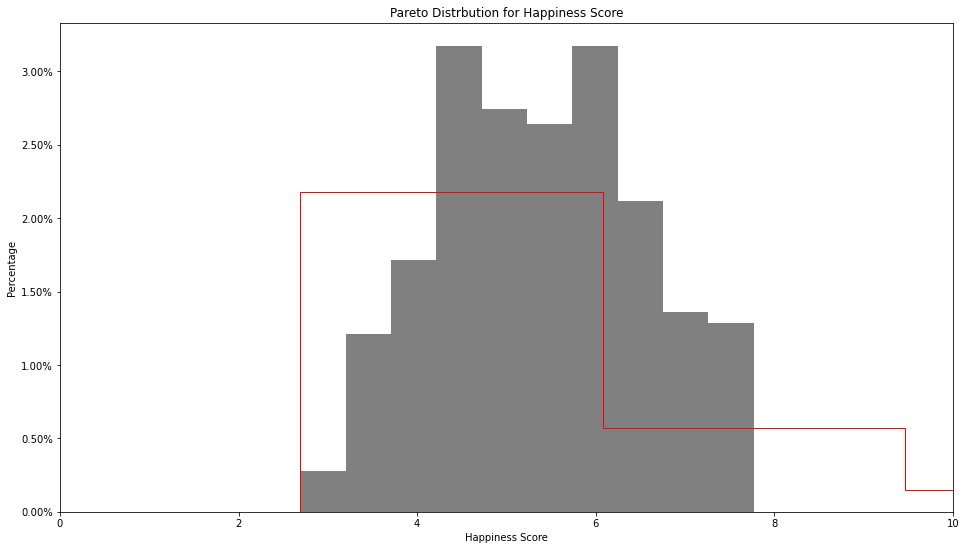

In [499]:
a, loc, scale = ss.pareto.fit(full_happy['Happiness_Score'])

pareto_model = ss.pareto(a,loc,scale).rvs(1000000)

plt.figure(figsize=(16, 9))
plt.hist(full_happy['Happiness_Score'], bins = 10, color = "grey", density=True);
plt.hist(pareto_model, bins = 10, color = "red", density=True, histtype="step");
plt.title("Pareto Distrbution for Happiness Score");
plt.xlabel("Happiness Score");
plt.ylabel("Percentage");
plt.xlim(0,10)
plt.gca().set_yticklabels(['{:.2f}%'.format(x*10) for x in plt.gca().get_yticks()]) ;

In [500]:

fig = px.bar(full_happy, x='Country', y='Happiness_Score',color='Happiness_Score',height=800)
fig.update_layout(title='Arrangement of countries in descending order of Happiness Score',titlefont_size=20)



In [501]:
data = dict(
            type = 'choropleth', 
            locations = full_happy['Country'],
            locationmode = 'country names',
            z = full_happy['Happiness_Score'],
            text = full_happy['Happiness_Rank'],
            colorscale = 'RdBu',
            colorbar = {'title':'Happiness'}
            )
layout = dict(
            title = 'Global Happiness', 
            geo = dict(
                    showframe = False, 
                    projection = go.layout.geo.Projection(type = 'equirectangular'),
#                     countrycolor = "rgb(217, 217, 217)"
                      )
             )
choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

# Analysis Training and Testing

In [502]:
full_happy.replace([np.inf, -np.inf], np.nan, inplace=True)
full_happy.fillna(999, inplace=True)



In [503]:
X = full_happy[['Happiness_Rank','GDP_per_Capita', 'Family',
       'Health', 'Freedom', 'Generosity',
       'Government_Corruption']]

y = full_happy['Happiness_Score'].values.reshape(-1, 1)

print(X.shape, y.shape)

(782, 7) (782, 1)


In [504]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = LinearRegression()

In [505]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

In [506]:
print(model.intercept_)
print(model.coef_)

[7.03950972]
[[-2.38377986e-02  9.55307140e-03  6.73648009e-02  4.09830658e-02
   1.59719087e-01  2.20760288e-01  2.64048468e-05]]


In [507]:
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.9855615001841639
Testing Score: 0.9834945902878532


Text(0.5, 1.0, 'Residual Plot')

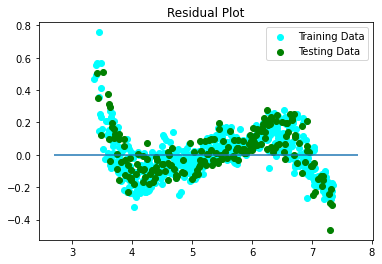

In [508]:
#print model validation
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="cyan", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="green", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [509]:
predictions = model.predict(X_test)
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)

print(f'MSE:{MSE},R2:{r2}')

MSE:0.020397475664776815,R2:0.9834945902878532
